### Basic EDA for variables related to medical exams results
#### [107,108, 122-125, 127, 128, 130, 131, 133-135]

In this notebook basic exploratory data analysis will be performed for the followings set of variables: 

| **Name**                               | **Description**                                           |
| :------------------------------------: | :-------------------------------------------------------: |
| ``glicemia``                           | Glycemia [mg ∙ dL-1]                                      |
| ``hemoglobina_glicada``                | Glycated hemoglobin [mg ∙ dL-1]                           |
| ``lipoproteina``                       | Lipoprotein [mg ∙ dL-1]                                   |
| ``hdl``                                | High-density cholesterol [mg ∙ dL-1]                      |
| ``colesterol_total``                   | Total cholesterol [mg ∙ dL-1]                             |
| ``trigliceridos``                      | Triglycerides [mg ∙ dL-1]                                 |
| ``creatinina_1_consulta``              | Creatinin in the first medical appointment  [mg ∙ dL-1]   |
| ``tasa_de_filtración_glomerular_tfg``  | First measure of glomerular filtration rate [mL ∙ min-1]  |
| ``microalbuminuria``                   | Microalbuminuria [mg ∙ g-1]                               |
| ``tsh``                                | Thyroid-stimulating hormone [mU ∙ L-1]                    |
| ``creatinina_2_consulta``              | Creatinin in the second medical appointment  [mg ∙ dL-1]  |
| ``tasa_de_filtración_glomerular_tfg3`` | Second measure of glomerular filtration rate [mL ∙ min-1] |
| ``cambio_de_tfg``                      | Change in glomerular filtration rate [mL ∙ min-1]         |


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading full dataset:

In [3]:
df = pd.read_csv('../data/raw/pluri_patients_2020.csv', sep = ';', decimal = ',')
df.head()

,edad,sexo,n_urg,n_hosp,n_cx,n_ce_med_general,n_ce_med_especializada,estancia_sala,estancia_uce,estancia_uci,...,tasa_de_filtración_glomerular_tfg,estadio_de_la_enfermedad_renal,microalbuminuria,tsh,clase_funcional,creatinina_2_consulta,tasa_de_filtración_glomerular_tfg3,cambio_de_tfg,úlcera_de_pie_diabético,estado_vital
0,29,F,1,1,0,3,9,2,0,0,...,NaN,Estadio 0,NaN,NaN,No clasificado,NaN,NaN,NaN,No,vivo
1,67,F,1,0,0,0,1,0,0,0,...,60.13,Estadio 2,3.02,5.77,Clase funcional 2B,0.86,60.13,0.0,No,vivo
2,83,M,1,0,0,4,3,0,0,0,...,NaN,Estadio 0,NaN,NaN,No clasificado,NaN,NaN,NaN,No,vivo
3,66,M,1,1,1,0,2,13,0,0,...,58.09,Estadio 3A,7.00,1.17,Clase funcional 4,0.00,0.00,0.0,No,fallecido
4,62,F,2,0,0,2,8,0,0,0,...,107.76,Estadio 1,68.00,2.89,Clase funcional 2B,0.00,0.00,0.0,No,vivo


In [4]:
df.shape

(5511, 137)

Defining a subset whit the variables of interest: 

In [5]:
variable_list = ['glicemia', 
'hemoglobina_glicada', 
'lipoproteina', 
'hdl', 
'colesterol_total', 
'trigliceridos', 
'creatinina_1_consulta', 
'tasa_de_filtración_glomerular_tfg', 
'microalbuminuria', 
'tsh', 
'creatinina_2_consulta', 
'tasa_de_filtración_glomerular_tfg3', 
'cambio_de_tfg']

sub_df = df.loc[:, df.columns.isin(variable_list)]
sub_df.head()

,glicemia,hemoglobina_glicada,lipoproteina,hdl,colesterol_total,trigliceridos,creatinina_1_consulta,tasa_de_filtración_glomerular_tfg,microalbuminuria,tsh,creatinina_2_consulta,tasa_de_filtración_glomerular_tfg3,cambio_de_tfg
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,151.09,7.88,66.27,41.34,142.03,172.08,0.86,60.13,3.02,5.77,0.86,60.13,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,96.10,6.60,0.00,35.10,97.50,74.00,0.92,58.09,7.00,1.17,0.00,0.00,0.0
4,243.00,9.61,84.78,40.00,142.00,84.00,0.47,107.76,68.00,2.89,0.00,0.00,0.0


In [6]:
sub_df.shape

(5511, 13)

Exploring values, type of data anda basic statistics in the subset: 

In [7]:
sub_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5511 entries, 0 to 5510
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   glicemia                            4352 non-null   float64
 1   hemoglobina_glicada                 4352 non-null   float64
 2   lipoproteina                        4352 non-null   float64
 3   hdl                                 4352 non-null   float64
 4   colesterol_total                    4352 non-null   float64
 5   trigliceridos                       4352 non-null   float64
 6   creatinina_1_consulta               4352 non-null   float64
 7   tasa_de_filtración_glomerular_tfg   4352 non-null   float64
 8   microalbuminuria                    4352 non-null   float64
 9   tsh                                 4352 non-null   float64
 10  creatinina_2_consulta               4352 non-null   float64
 11  tasa_de_filtración_glomerular_tfg3  4352 no

In [8]:
sub_df.isna().sum()

glicemia                              1159
hemoglobina_glicada                   1159
lipoproteina                          1159
hdl                                   1159
colesterol_total                      1159
trigliceridos                         1159
creatinina_1_consulta                 1159
tasa_de_filtración_glomerular_tfg     1159
microalbuminuria                      1159
tsh                                   1159
creatinina_2_consulta                 1159
tasa_de_filtración_glomerular_tfg3    1159
cambio_de_tfg                         1159
dtype: int64

In [9]:
_ = [print(x, ": ", sub_df[x].sort_values().unique(), "\n") for x in sub_df.columns]

glicemia :  [  0.     1.07   1.13 ... 990.   993.      nan] 

hemoglobina_glicada :  [  0.      3.      4.      4.11    4.19    4.33    4.4     4.41    4.5
   4.64    4.7     4.73    4.79    4.8     4.83    4.85    4.89    4.9
   4.91    4.92    4.93    4.94    4.98    4.99    5.      5.01    5.02
   5.03    5.04    5.05    5.06    5.07    5.08    5.09    5.1     5.11
   5.12    5.13    5.15    5.16    5.18    5.19    5.2     5.21    5.22
   5.23    5.24    5.25    5.26    5.27    5.28    5.29    5.3     5.31
   5.32    5.33    5.34    5.35    5.36    5.37    5.38    5.39    5.4
   5.41    5.42    5.43    5.44    5.45    5.46    5.47    5.48    5.49
   5.5     5.51    5.52    5.53    5.54    5.55    5.56    5.57    5.58
   5.59    5.6     5.61    5.62    5.63    5.64    5.65    5.66    5.67
   5.68    5.69    5.7     5.71    5.72    5.73    5.74    5.75    5.76
   5.77    5.78    5.79    5.8     5.81    5.82    5.83    5.84    5.85
   5.86    5.87    5.88    5.89    5.9     5.91    5.9

In [10]:
sub_df.describe()

,glicemia,hemoglobina_glicada,lipoproteina,hdl,colesterol_total,trigliceridos,creatinina_1_consulta,tasa_de_filtración_glomerular_tfg,microalbuminuria,tsh,creatinina_2_consulta,tasa_de_filtración_glomerular_tfg3,cambio_de_tfg
count,4352.000000,4352.000000,4352.000000,4352.000000,4352.000000,4352.000000,4352.000000,4352.000000,4352.000000,4352.000000,4352.000000,4352.000000,4352.000000
mean,101.089072,5.019526,46.145967,41.347714,133.767780,123.940409,0.970905,59.186726,46.654304,2.644399,0.956250,42.426914,0.026721
std,114.898783,3.805773,47.725856,151.424763,67.504819,92.580687,0.948521,40.304276,305.177875,6.329633,4.617593,43.717118,2.626247
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-89.090000
25%,74.000000,4.797500,0.000000,31.900000,110.167500,72.730000,0.650000,36.007500,0.000000,0.030000,0.000000,0.000000,0.000000
50%,91.000000,5.900000,46.075000,40.100000,138.090000,111.080000,0.840000,54.100000,1.700000,1.810000,0.740000,40.755000,0.000000
75%,112.000000,6.660000,77.705000,49.325000,169.000000,161.692500,1.070000,77.580000,10.485000,3.402500,1.020000,65.112500,0.000000
max,993.000000,109.000000,439.000000,9922.000000,1798.000000,1299.000000,13.110000,578.470000,9886.750000,285.000000,140.000000,760.040000,65.170000


With the results we know that from 5511 rows (patients) only 4352 have information in the variables of interest.

Data is consistent in the sense of that a patient that has information for one medical exam it has information for all medical exams, and if a patient has no information for one medical exam it has no information for any medical exam. This is that every row has all medical results or none of them.

We proceed to drop NaNs.

In [12]:
sub_df.dropna()

,glicemia,hemoglobina_glicada,lipoproteina,hdl,colesterol_total,trigliceridos,creatinina_1_consulta,tasa_de_filtración_glomerular_tfg,microalbuminuria,tsh,creatinina_2_consulta,tasa_de_filtración_glomerular_tfg3,cambio_de_tfg
1,151.09,7.88,66.27,41.34,142.03,172.08,0.86,60.13,3.02,5.77,0.86,60.13,0.0
3,96.10,6.60,0.00,35.10,97.50,74.00,0.92,58.09,7.00,1.17,0.00,0.00,0.0
4,243.00,9.61,84.78,40.00,142.00,84.00,0.47,107.76,68.00,2.89,0.00,0.00,0.0
5,88.00,6.50,0.00,46.10,134.40,111.00,1.03,38.74,131.40,2.45,0.87,45.87,0.0
7,84.00,0.00,0.00,33.19,128.10,97.70,0.91,92.76,0.00,1.70,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5506,0.00,5.66,106.00,47.00,170.00,83.00,0.70,129.24,0.00,1.57,0.70,129.24,0.0
5507,87.00,5.70,0.00,63.20,149.60,66.50,0.82,42.59,0.30,7.40,0.00,0.00,0.0
5508,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
5509,786.00,5.40,119.20,61.44,198.30,88.00,0.55,109.50,0.40,3.07,0.00,0.00,0.0


We will explore a initial way to determine if there are some posible outliers,  by looking for the ranges of values that are usual for each medical exam. First, we plot a very general graph to explore data distribution, considering that each variable has diferents units:

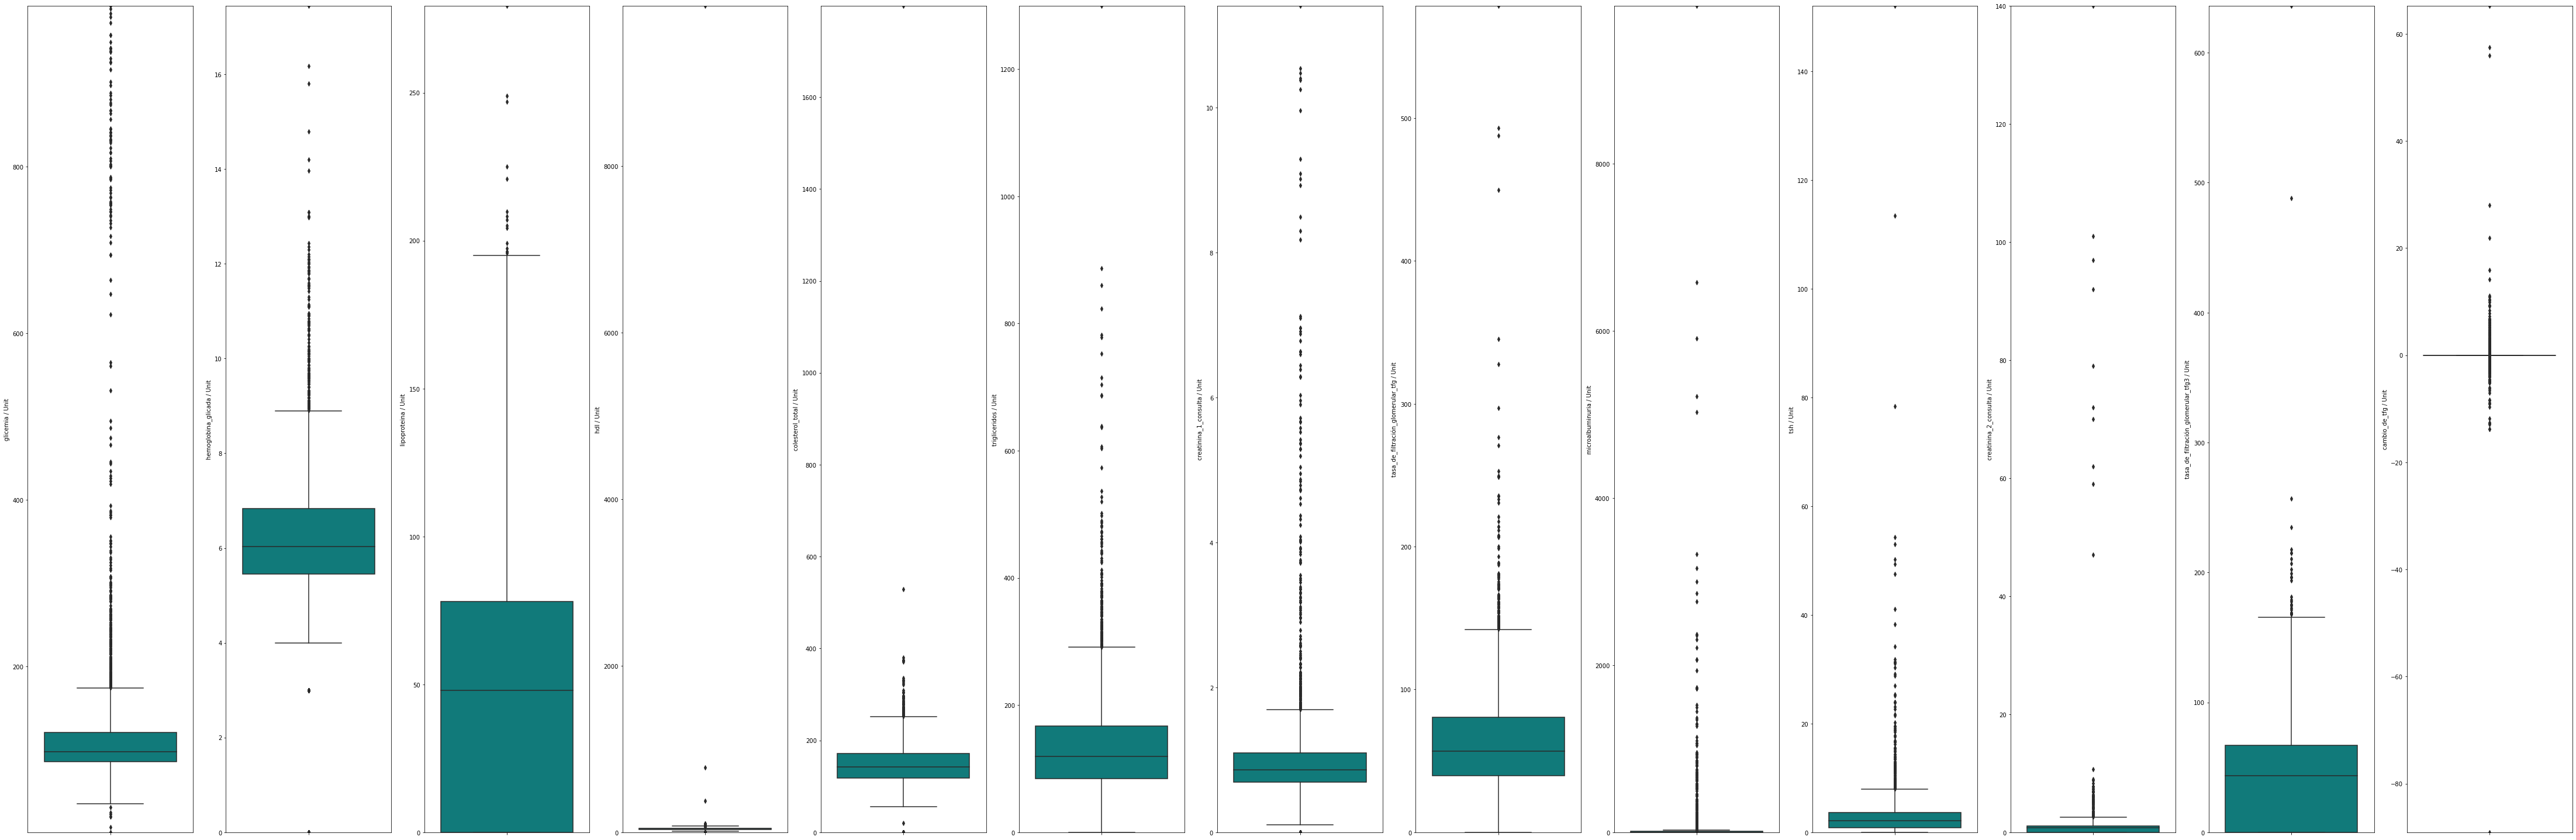

In [55]:
fig, axes = plt.subplots(1, len(variable_list))
for i, col in enumerate(variable_list):
    ax = sns.boxplot(y=sub_df[col], ax=axes.flatten()[i], color='darkcyan')
    ax.set_ylim(sub_df[col].min(), sub_df[col].max())
    ax.set_ylabel(col + ' / Unit')
plt.rcParams['figure.figsize'] = (78,26)
plt.show()

Now, we will explore variable by variable.

``glicemia``: a search for usual values that takes the results of this exam shows that, in general, between 70 and 100 mg ∙ dL-1 is considered normal, below 55 mg ∙ dL-1 is indicative of hypoglucemia and over 200 mg ∙ dL-1 is indicative of diabetes.

This variable has a lot of outliers according to the boxplot, but being conservative and avoiding to omit some values derived from a medical condition or a very sick patient we will for now explore data distribution establishing maximum and minimum bounds as 55 and 200, respectively.

c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


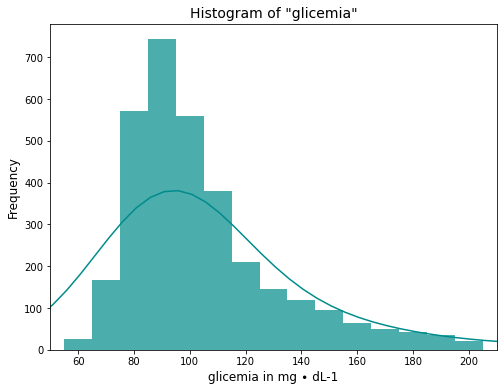

In [118]:
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['patch.linewidth'] = 0
plt.rcParams['patch.edgecolor'] = 'none'

graph_df = sub_df.dropna()
graph_df['glicemia'].replace(0, np.nan, inplace=True)

fig, ax = plt.subplots()
sns.histplot(data=graph_df, x='glicemia', binwidth=10, kde=True,
            binrange=(55,200), color='darkcyan', alpha =.7)
plt.title('Histogram of "glicemia"', fontsize=14)
plt.xlabel('glicemia in mg ∙ dL-1', fontsize=12)
plt.ylabel('Frequency', fontsize=12) 
ax.set_xlim(50,210)
plt.show()

c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


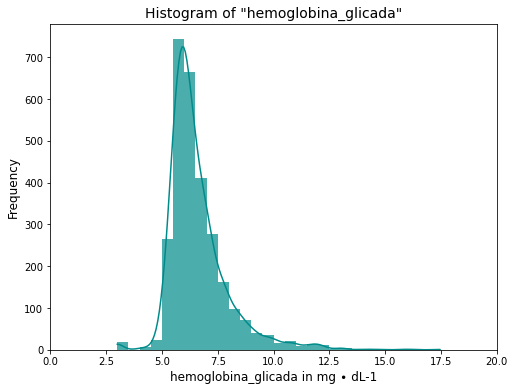

In [122]:
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['patch.linewidth'] = 0
plt.rcParams['patch.edgecolor'] = 'none'

graph_df = sub_df.dropna()
graph_df['hemoglobina_glicada'].replace(0, np.nan, inplace=True)

fig, ax = plt.subplots()
sns.histplot(data=graph_df, x='hemoglobina_glicada', binwidth=.5, kde=True,
            binrange=(0,20), color='darkcyan', alpha =.7)
plt.title('Histogram of "hemoglobina_glicada"', fontsize=14)
plt.xlabel('hemoglobina_glicada in mg ∙ dL-1', fontsize=12)
plt.ylabel('Frequency', fontsize=12) 
ax.set_xlim(0,20)
plt.show()

c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


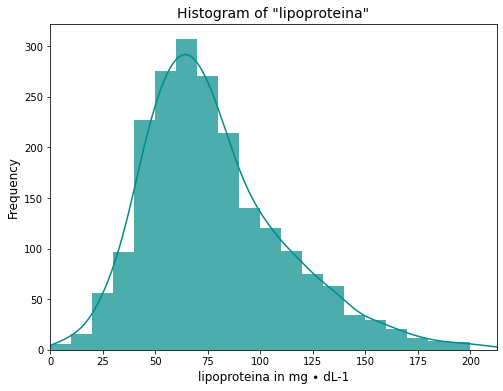

In [125]:
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['patch.linewidth'] = 0
plt.rcParams['patch.edgecolor'] = 'none'

graph_df = sub_df.dropna()
graph_df['lipoproteina'].replace(0, np.nan, inplace=True)

fig, ax = plt.subplots()
sns.histplot(data=graph_df, x='lipoproteina', binwidth=10, kde=True,
            binrange=(0,200), color='darkcyan', alpha =.7)
plt.title('Histogram of "lipoproteina"', fontsize=14)
plt.xlabel('lipoproteina in mg ∙ dL-1', fontsize=12)
plt.ylabel('Frequency', fontsize=12) 
ax.set_xlim(0,212.5)
plt.show()

c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


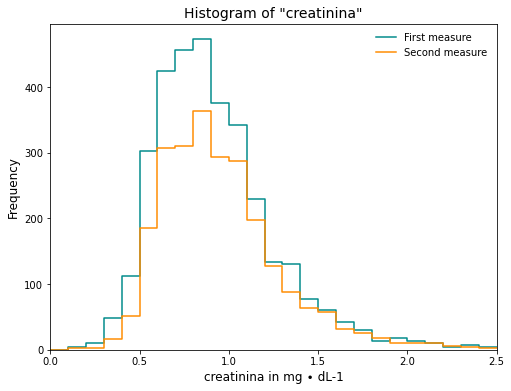

In [126]:
plt.rcParams['figure.figsize'] = (8,6)

graph_df = sub_df.dropna()
graph_df['creatinina_1_consulta'].replace(0, np.nan, inplace=True)
graph_df['creatinina_2_consulta'].replace(0, np.nan, inplace=True)

fig, ax = plt.subplots()

sns.histplot(data=graph_df, x='creatinina_1_consulta', binwidth=.1, binrange=(0,2.5),
            alpha =.7, element='step', fill=False, color=  'darkcyan', label='First measure')
sns.histplot(data=graph_df, x='creatinina_2_consulta', binwidth=.1, binrange=(0,2.5),
            alpha =.7, element='step', fill=False, color='darkorange', label='Second measure')

plt.title('Histogram of "creatinina"', fontsize=14)
plt.xlabel('creatinina in mg ∙ dL-1', fontsize=12)
plt.ylabel('Frequency', fontsize=12) 
ax.set_xlim(0,2.5)
plt.legend()
plt.show()

A first insight considering the results is that every exam can be considered an alternative or complement for another predictor, e.g. ``glicemia`` can be used for an analysis instead of ``diabetes`` if a continuous variable is needed instead of a discrete one. 